<a href="https://colab.research.google.com/github/Eric-Mendes/previsao-da-rodada/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import requests
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [16]:
RODADAS = 34
rodadas = (f'{n:02}' for n in range(1, RODADAS+1))

In [17]:
data = []
for rodada in rodadas:
  with requests.get(f'https://api.cartolafc.globo.com/partidas/{rodada}') as response:
      assert response.status_code == 200
      partidas = response.json()['partidas']
      for partida in partidas:
        if partida['placar_oficial_mandante'] is not None:
          partida = [
                    rodada, 
                    partida['clube_casa_id'], 
                    partida['placar_oficial_mandante'], 
                    partida['placar_oficial_visitante'], 
                    partida['clube_visitante_id']]
          data.append(partida)

df = pd.DataFrame(data, columns=['RODADA', 
                                 'ID MANDANTE', 
                                 'PLACAR MANDANTE', 
                                 'PLACAR VISITANTE', 
                                 'ID VISITANTE'])

In [18]:
TOTAL_JOGOS = len(df)
GOLS_FEITOS_MANDANTE_COUNT = sum(df['PLACAR MANDANTE'])
GOLS_FEITOS_VISITANTE_COUNT = sum(df['PLACAR VISITANTE'])

GOLS_FEITOS_MANDANTE_AVG = GOLS_FEITOS_MANDANTE_COUNT / TOTAL_JOGOS
GOLS_FEITOS_VISITANTE_AVG = GOLS_FEITOS_VISITANTE_COUNT / TOTAL_JOGOS

gols_feitos_stats = {'total_jogos': TOTAL_JOGOS, 'count_mandante': GOLS_FEITOS_MANDANTE_COUNT, 
                     'count_visitante': GOLS_FEITOS_VISITANTE_COUNT, 'avg_mandante': GOLS_FEITOS_MANDANTE_AVG, 
                     'avg_visitante': GOLS_FEITOS_VISITANTE_AVG}

In [19]:
GOLS_TOMADOS_MANDANTE_COUNT = sum(df['PLACAR VISITANTE'])
GOLS_TOMADOS_VISITANTE_COUNT = sum(df['PLACAR MANDANTE'])

GOLS_TOMADOS_MANDANTE_AVG = GOLS_TOMADOS_MANDANTE_COUNT / TOTAL_JOGOS
GOLS_TOMADOS_VISITANTE_AVG = GOLS_TOMADOS_VISITANTE_COUNT / TOTAL_JOGOS

gols_tomados_stats = {'total_jogos': TOTAL_JOGOS, 'count_mandante': GOLS_TOMADOS_MANDANTE_COUNT, 
                      'count_visitante': GOLS_TOMADOS_VISITANTE_COUNT, 'avg_mandante': GOLS_TOMADOS_MANDANTE_AVG, 
                      'avg_visitante': GOLS_TOMADOS_VISITANTE_AVG}

In [20]:
dat = []
with requests.get(f'https://api.cartolafc.globo.com/partidas/01') as response:
  assert response.status_code == 200
  times = response.json()['clubes']
  dat = [[time['id'], time['nome']] for _, time in times.items()]

df_clubes = pd.DataFrame(dat, columns=['id', 'nome'])
feitos_casa = []
tomados_casa = []

feitos_fora = []
tomados_fora = []
nro_jogos = []

avg_feitos_casa = []
avg_tomados_casa = []
avg_feitos_fora = []
avg_tomados_fora = []

ataque_casa = []
defesa_casa = []
ataque_fora = []
defesa_fora = []

for id in df_clubes['id']:
  feitos_casa.append(sum(df['PLACAR MANDANTE'][df['ID MANDANTE'] == id]))
  tomados_casa.append(sum(df['PLACAR VISITANTE'][df['ID MANDANTE'] == id]))

  feitos_fora.append(sum(df['PLACAR VISITANTE'][df['ID VISITANTE'] == id]))
  tomados_fora.append(sum(df['PLACAR MANDANTE'][df['ID VISITANTE'] == id]))
  jogos = len(df[df['ID MANDANTE'] == id]) + len(df[df['ID VISITANTE'] == id])
  nro_jogos.append(jogos)

  jogos_casa = len(df[df['ID MANDANTE'] == id])
  jogos_fora = len(df[df['ID VISITANTE'] == id])

  afc = sum(df['PLACAR MANDANTE'][df['ID MANDANTE'] == id]) / jogos_casa
  atc = sum(df['PLACAR VISITANTE'][df['ID MANDANTE'] == id]) / jogos_casa
  aff = sum(df['PLACAR VISITANTE'][df['ID VISITANTE'] == id]) / jogos_fora
  atf = sum(df['PLACAR MANDANTE'][df['ID VISITANTE'] == id]) / jogos_fora

  avg_feitos_casa.append(afc)
  avg_tomados_casa.append(atc)
  avg_feitos_fora.append(aff)
  avg_tomados_fora.append(atf)

  fac = afc / gols_feitos_stats['avg_mandante']
  faf = aff / gols_feitos_stats['avg_visitante']
  fdc = atc / gols_tomados_stats['avg_mandante']
  fdf = atf / gols_tomados_stats['avg_visitante']

  ataque_casa.append(fac)
  ataque_fora.append(faf)
  defesa_casa.append(fdc)
  defesa_fora.append(fdf)

df_clubes['gols feitos casa'] = feitos_casa
df_clubes['gols tomados casa'] = tomados_casa
df_clubes['gols feitos fora'] = feitos_fora
df_clubes['gols tomados fora'] = tomados_fora
df_clubes['número de jogos'] = nro_jogos

df_clubes['avg feitos casa'] = avg_feitos_casa
df_clubes['avg tomados casa'] = avg_tomados_casa
df_clubes['avg feitos fora'] = avg_feitos_fora
df_clubes['avg tomados fora'] = avg_tomados_fora

df_clubes['força ataque casa'] = ataque_casa
df_clubes['força defesa casa'] = defesa_casa
df_clubes['força ataque fora'] = ataque_fora
df_clubes['força defesa fora'] = defesa_fora

df_clubes = df_clubes.set_index(df_clubes['id'])

In [21]:
df_clubes_limpa = df_clubes[['id', 'nome', 'força ataque casa', 'força ataque fora', 'força defesa casa', 'força defesa fora']]
df_clubes.drop(labels="id", axis="columns")
df_clubes_limpa

,id,nome,força ataque casa,força ataque fora,força defesa casa,força defesa fora
id,,,,,,
1371,1371,Cuiabá,0.760181,0.915033,1.037037,0.712670
262,262,Flamengo,1.377828,2.268519,0.793028,0.807692
264,264,Corinthians,1.140271,0.793028,1.037037,0.712670
265,265,Bahia,1.009615,0.793028,1.166667,1.187783
266,266,Fluminense,0.950226,0.793028,0.854031,0.950226
275,275,Palmeiras,1.425339,1.342048,1.464052,0.760181
276,276,São Paulo,0.656250,0.793028,0.907407,0.902715
277,277,Santos,0.855204,0.732026,0.793028,1.187783
280,280,Bragantino,1.235294,1.464052,1.159041,0.997738


In [22]:
df_clubes_limpa = df_clubes_limpa.set_index([df_clubes_limpa['id']])
df_clubes_limpa = df_clubes_limpa.drop(labels="id", axis='columns')

In [23]:
def expectations(home, away):
  H = float(df_clubes_limpa['força ataque casa'].loc[home]) * float(df_clubes_limpa['força defesa fora'].loc[away]) * float(df_clubes['avg feitos casa'].loc[home])
  A = float(df_clubes_limpa['força ataque fora'].loc[away]) * float(df_clubes_limpa['força defesa casa'].loc[home]) * float(df_clubes['avg feitos fora'].loc[away])
  return H, A

In [24]:
import math

def poisson(lamb, x):
  return (lamb**x * math.e**(-lamb)) / math.factorial(x)

In [25]:
df_clubes_limpa.loc[275]

nome                 Palmeiras
força ataque casa      1.42534
força ataque fora      1.34205
força defesa casa      1.46405
força defesa fora     0.760181
Name: 275, dtype: object

In [26]:
with requests.get('https://api.cartolafc.globo.com/partidas') as response:
    data = response.json()
    aux = []
    for partida in data['partidas']:
        home = partida['clube_casa_id']
        away = partida['clube_visitante_id']
        times = [str(dict(dat)[home]), str(dict(dat)[away])]
        probs = []
        exp_h, exp_a = expectations(home, away)

        for i in range(6):
          for j in range(6):
            aux.append([*times, i, j, round(poisson(exp_h, i) * 100, 2), round(poisson(exp_a, j) * 100, 2), round(poisson(exp_h, i) * poisson(exp_a, j) * 100, 2)])
            aux = sorted(aux, key=lambda l: l[-1], reverse=True)

  
    df_new = pd.DataFrame(aux, columns=['home', 'away', 'home_score', 'away_score', 'prob_home', 'prob_away', 'score_prob'])

In [27]:
df_new.drop_duplicates(subset=['home'])

,home,away,home_score,away_score,prob_home,prob_away,score_prob
0,Atlético-GO,Bahia,0,0,58.30,62.40,36.37
1,Ceará,Corinthians,0,0,38.14,61.82,23.58
2,América-MG,Chapecoense,1,0,36.57,62.38,22.81
6,Grêmio,São Paulo,1,0,36.46,53.32,19.44
7,Fluminense,Internacional,0,0,38.44,50.18,19.29
11,Sport,Flamengo,0,3,76.10,22.03,16.76
13,Santos,Fortaleza,0,0,37.18,39.77,14.79
15,Athlético-PR,Cuiabá,0,1,38.14,36.77,14.02
23,Juventude,Bragantino,0,1,44.67,28.54,12.75
35,Palmeiras,Atlético-MG,1,1,31.68,30.88,9.78


In [48]:
def graph(home, away, ax, i, j):
  x = df_new['home_score'][df_new['home'] == home]
  y = df_new['prob_home'][df_new['home'] == home]

  x2 = df_new['away_score'][df_new['away'] == away]
  y2 = df_new['prob_away'][df_new['away'] == away]

  ax[i][j].set_title(f'{home} X {away}')
  ax[i][j].set_xlabel('Gols')
  ax[i][j].set_ylabel('Probabilidade (%)')
  ax[i][j].scatter(x, y, label='Casa')
  ax[i][j].scatter(x2, y2, color='r', label='Visitante')
  ax[i][j].grid()
  ax[i][j].legend()

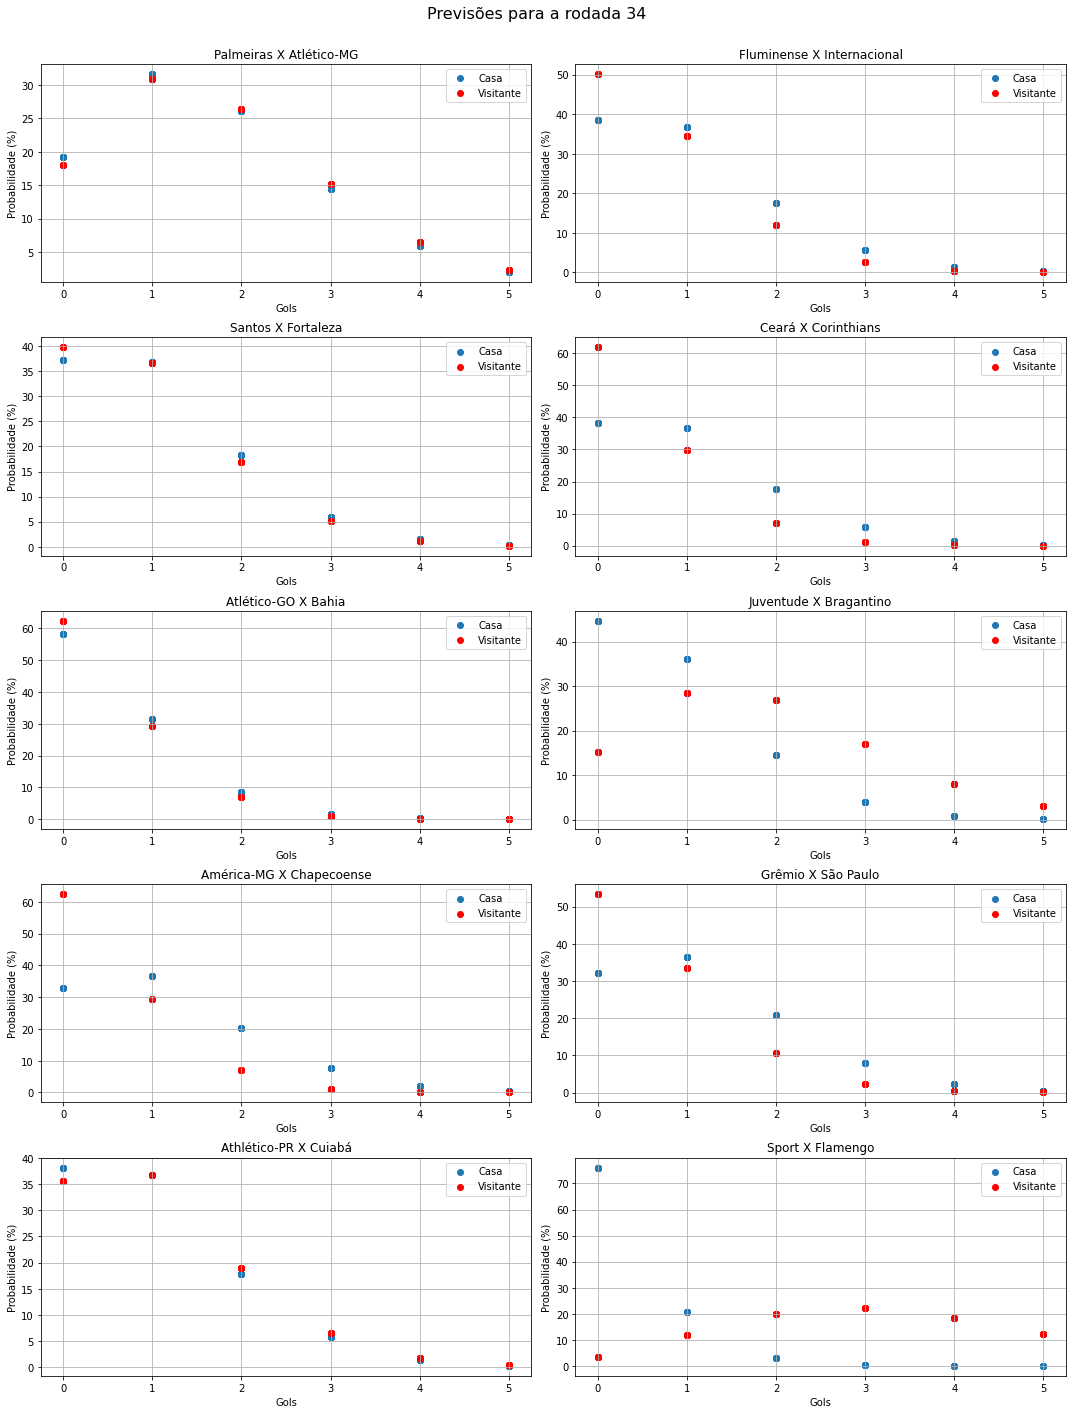

In [59]:
with requests.get('https://api.cartolafc.globo.com/partidas') as response:
    data = response.json()
    fig, ax = plt.subplots(5, 2, figsize=(15, 20))
    fig.suptitle(f"Previsões para a rodada {RODADAS+1}", fontsize=16)
    d = {
        0: (0, 0),
        1: (0, 1),
        2: (1, 0),
        3: (1, 1),
        4: (2, 0),
        5: (2, 1),
        6: (3, 0),
        7: (3, 1),
        8: (4, 0),
        9: (4, 1),
    }
    for i, partida in enumerate(data['partidas']):
        home = partida['clube_casa_id']
        away = partida['clube_visitante_id']
        times = [str(dict(dat)[home]), str(dict(dat)[away])]

        graph(*times, ax, *d[i])
    
    fig.tight_layout()
    fig.subplots_adjust(top=0.94)
    plt.show()